## Import Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
import os

In [3]:
os.getcwd()

'/Users/pournimakamble/Desktop/Pournima/Data_Analysis_Projects/Flipkart_Sales_Analyst/Notebooks'

In [4]:
df = pd.read_csv('../Data/flipkart_sales_enriched.csv')


In [5]:
df.head(10)

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating,Month,Year,Profit (INR),Discount %,Customer Segment,Region
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5,September,2024,19627.824,11,Online,West
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9,December,2024,10204.680,24,Wholesale,North
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4,May,2024,8873.752,19,Online,South
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2,November,2024,6531.562,15,Online,North
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1,December,2024,15954.048,12,Retail,North
5,ORD00006,Mixer Grinder,Home & Kitchen,10475.03,2,20950.06,2024-10-22,Wallet,1.7,October,2024,4190.012,25,Wholesale,North
6,ORD00007,Sneakers,Clothing,38647.72,3,115943.16,2024-07-04,Wallet,2.0,July,2024,23188.632,11,Wholesale,North
7,ORD00008,Table Lamp,Home & Kitchen,24818.59,3,74455.77,2024-12-27,Debit Card,2.4,December,2024,14891.154,30,Wholesale,South
8,ORD00009,Jacket,Clothing,1987.39,2,3974.78,2025-01-18,Debit Card,2.6,January,2025,794.956,23,Online,North
9,ORD00010,Tablet,Electronics,26876.51,2,53753.02,2024-03-14,Debit Card,4.0,March,2024,10750.604,27,Online,North


## Understanding Dataset

In [6]:
print("Rows, Columns:", df.shape)

Rows, Columns: (1000, 15)


In [7]:
## Column Names
display(df.columns)

Index(['Order ID', 'Product Name', 'Category', 'Price (INR)', 'Quantity Sold',
       'Total Sales (INR)', 'Order Date', 'Payment Method', 'Customer Rating',
       'Month', 'Year', 'Profit (INR)', 'Discount %', 'Customer Segment',
       'Region'],
      dtype='object')

In [8]:
display(df.dtypes)

Order ID              object
Product Name          object
Category              object
Price (INR)          float64
Quantity Sold          int64
Total Sales (INR)    float64
Order Date            object
Payment Method        object
Customer Rating      float64
Month                 object
Year                   int64
Profit (INR)         float64
Discount %             int64
Customer Segment      object
Region                object
dtype: object

In [9]:
## Missing Value
missing = df.isna().sum()
missing

Order ID             0
Product Name         0
Category             0
Price (INR)          0
Quantity Sold        0
Total Sales (INR)    0
Order Date           0
Payment Method       0
Customer Rating      0
Month                0
Year                 0
Profit (INR)         0
Discount %           0
Customer Segment     0
Region               0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price (INR),1000.0,24520.258260,14187.611227,139.85,12378.905,24650.015,35981.925,49911.75
Quantity Sold,1000.0,3.097000,1.410525,1.00,2.000,3.000,4.000,5.00
Total Sales (INR),1000.0,75213.112740,59457.598352,419.55,28581.765,57358.300,110618.595,243903.90
Customer Rating,1000.0,3.011100,1.145408,1.00,2.000,3.100,4.000,5.00
Year,1000.0,2024.103000,0.304111,2024.00,2024.000,2024.000,2024.000,2025.00
Profit (INR),1000.0,15042.622548,11891.519670,83.91,5716.353,11471.660,22123.719,48780.78
Discount %,1000.0,17.699000,7.847801,5.00,11.000,18.000,25.000,30.00


## Data Cleaning and Feature Engineering


In [11]:
## Convert Order Date Oject to Datetime
df['Order Date']=pd.to_datetime(df['Order Date'])

In [12]:
df['Order Date'].dtype

dtype('<M8[ns]')

In [13]:
## create Month Number
df['Month_Num'] = df['Order Date'].dt.month

In [14]:
# Create Quater
df['Quarter'] = df['Order Date'].dt.to_period('Q')

In [15]:
# Profit Margin (%)
df['Profit_margin_%'] = (df['Profit (INR)'] / df['Total Sales (INR)']) *100
df['Profit_margin_%']

0      20.0
1      20.0
2      20.0
3      20.0
4      20.0
       ... 
995    20.0
996    20.0
997    20.0
998    20.0
999    20.0
Name: Profit_margin_%, Length: 1000, dtype: float64

In [16]:
## Price Band 
df['Price Band'] = pd.cut(
    df['Price (INR)'],
    bins = [0,5000,15000,30000,50000],
    labels = ['Low','Mid','High','Premium']
)

In [17]:
## Validate New Columns 

df[['Order Date', 'Month_Num', 'Quarter', 'Profit_margin_%', 'Price (INR)','Price Band']].head(10)

,Order Date,Month_Num,Quarter,Profit_margin_%,Price (INR),Price Band
0,2024-09-12,9,2024Q3,20.0,49069.56,Premium
1,2024-12-18,12,2024Q4,20.0,12755.85,Mid
2,2024-05-18,5,2024Q2,20.0,11092.19,Mid
3,2024-11-08,11,2024Q4,20.0,32657.81,Premium
4,2024-12-27,12,2024Q4,20.0,26590.08,High
5,2024-10-22,10,2024Q4,20.0,10475.03,Mid
6,2024-07-04,7,2024Q3,20.0,38647.72,Premium
7,2024-12-27,12,2024Q4,20.0,24818.59,High
8,2025-01-18,1,2025Q1,20.0,1987.39,Low
9,2024-03-14,3,2024Q1,20.0,26876.51,High


## Creating KPI for Business Analysis

In [18]:
kpis = {
    "Total Revenue (INR)": df['Total Sales (INR)'].sum(),
    "Total Profit (INR)": df['Profit (INR)'].sum(),
    "Avg Order Value (INR)": df['Total Sales (INR)'].mean(),
    "Avg Discount (%)": df['Discount %'].mean(),
    "Avg Rating": df['Customer Rating'].mean(),
    "Total Orders":len(df)
    
}

for k, v in kpis.items():
    if "INR" in k:
        print(f"{k}: ₹{v:,.2f}")
    else:
        print(f"{k}: ₹{v:,.2f}")


Total Revenue (INR): ₹75,213,112.74
Total Profit (INR): ₹15,042,622.55
Avg Order Value (INR): ₹75,213.11
Avg Discount (%): ₹17.70
Avg Rating: ₹3.01
Total Orders: ₹1,000.00


## Monthly Revenue Trend

In [19]:
df['Year_Month'] = df['Order Date'].dt.to_period('M')
df['Year_Month']

0      2024-09
1      2024-12
2      2024-05
3      2024-11
4      2024-12
        ...   
995    2025-01
996    2024-12
997    2024-07
998    2024-10
999    2024-03
Name: Year_Month, Length: 1000, dtype: period[M]

In [20]:
monthly_rev = (
    df.groupby('Year_Month')['Total Sales (INR)'].sum().reset_index()
)
monthly_rev['Year_Month'] = monthly_rev['Year_Month'].astype(str)
monthly_rev

,Year_Month,Total Sales (INR)
0,2024-02,3910477.01
1,2024-03,6508879.04
2,2024-04,7334962.92
3,2024-05,6706004.97
4,2024-06,4992364.75
5,2024-07,7637324.95
6,2024-08,5418893.98
7,2024-09,6264222.31
8,2024-10,5702923.37
9,2024-11,5578535.08


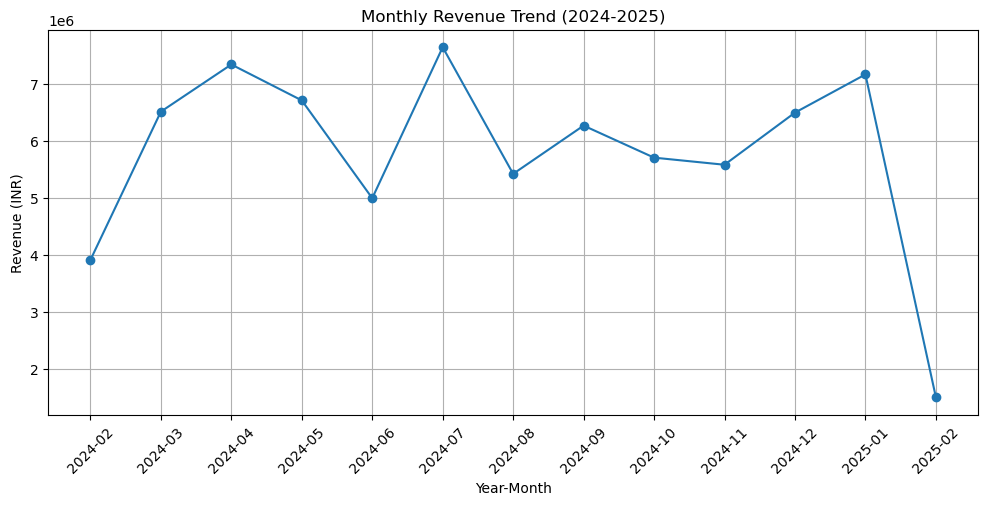

In [21]:
## Plot
plt.figure(figsize=(12,5))
plt.plot(
    monthly_rev['Year_Month'],
    monthly_rev['Total Sales (INR)'],
    marker ='o'
)

plt.title('Monthly Revenue Trend (2024-2025)')
plt.xlabel('Year-Month')
plt.ylabel('Revenue (INR)')
plt.xticks(rotation = 45)
plt.grid(True)

plt.savefig(
    '../outputs/monthly_revenue_trend.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

In [22]:
## Category Revenue Leaders

category_rev = (
    df.groupby('Category')['Total Sales (INR)']
    .sum()
    .sort_values(ascending = False)
    .reset_index()
)
category_rev.head(5)


,Category,Total Sales (INR)
0,Electronics,17307173.07
1,Clothing,15114386.86
2,Books,14785759.65
3,Beauty,14680584.05
4,Home & Kitchen,13325209.11


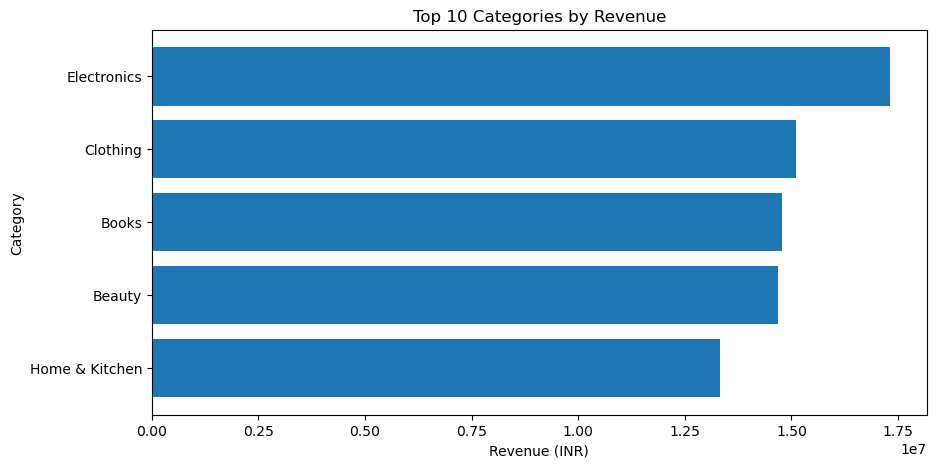

In [23]:
## Category Revenue Plot

plt.figure(figsize = (10,5))
plt.barh(
    category_rev['Category'][:10],
    category_rev['Total Sales (INR)'][:10]
)

plt.title('Top 10 Categories by Revenue')
plt.xlabel('Revenue (INR)')
plt.ylabel('Category')
plt.gca().invert_yaxis()

plt.savefig(
    '../outputs/Top_Category_revenue.png',
    dpi=300,
    bbox_inches='tight'
)

plt.show()


### Pricing and Discount Analysis

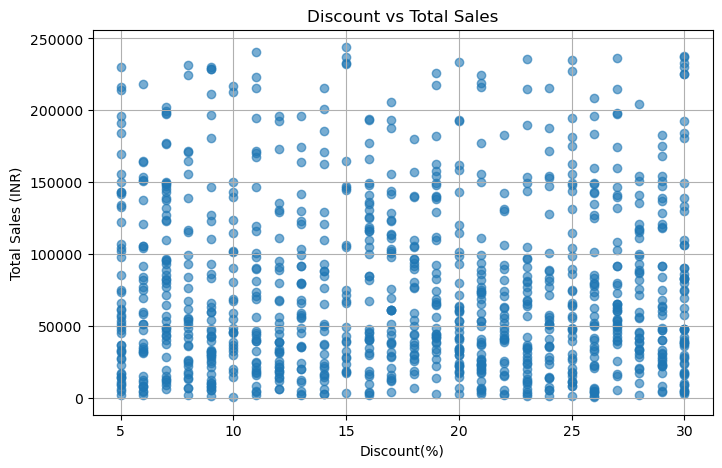

In [24]:
plt.figure(figsize = (8,5))

plt.scatter(
    df['Discount %'],
    df['Total Sales (INR)'],
    alpha = 0.6
)

plt.title("Discount vs Total Sales")
plt.xlabel('Discount(%)')
plt.ylabel('Total Sales (INR)')
plt.grid(True)

plt.savefig(
    '../outputs/Discount_vs_Sales.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

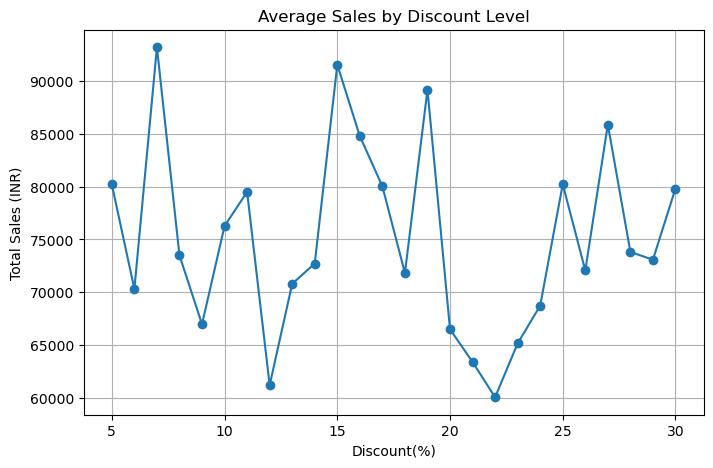

In [25]:
discount_group = (
    df.groupby('Discount %')['Total Sales (INR)']
    .mean()
    .reset_index()
)
plt.figure(figsize=(8,5))

plt.plot(
    discount_group['Discount %'],
    discount_group['Total Sales (INR)'],
    marker ='o'
)
plt.title("Average Sales by Discount Level")
plt.xlabel('Discount(%)')
plt.ylabel('Total Sales (INR)')
plt.grid(True)

plt.savefig(
    '../outputs/avg_Sales_by_discount.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

In [26]:
## Segment_Wise Revenue

segment_rev = (
    df.groupby('Customer Segment')['Total Sales (INR)']
    .sum()
    .sort_values(ascending = False)
    .reset_index()
)

segment_rev

,Customer Segment,Total Sales (INR)
0,Wholesale,25732035.67
1,Online,25169884.13
2,Retail,24311192.94


In [27]:
## Region Wise Reveunue

region_rev = (
    df.groupby('Region')['Total Sales (INR)']
    .sum()
    .sort_values(ascending = False)
    .reset_index()
)

region_rev

,Region,Total Sales (INR)
0,North,20289991.87
1,South,19862508.71
2,West,18392767.90
3,East,16667844.26


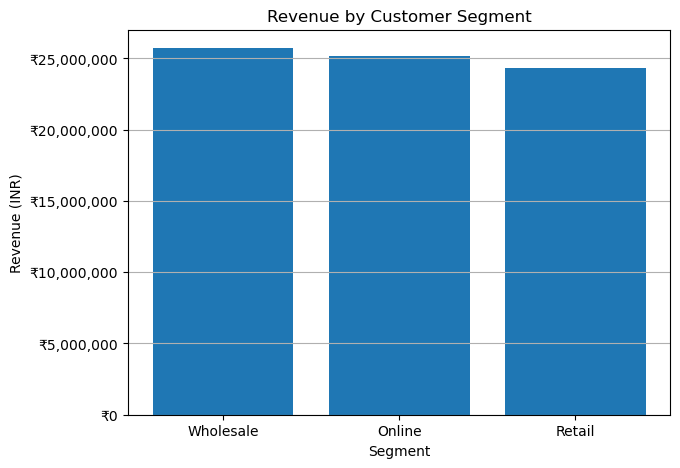

In [33]:
## Segement Revenue Chart

plt.figure(figsize=(7,5))

plt.bar(
    segment_rev['Customer Segment'],
    segment_rev['Total Sales (INR)']
)

plt.title('Revenue by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Revenue (INR)')
plt.grid(axis='y')

plt.gca().yaxis.set_major_formatter(
    FuncFormatter(lambda x, _:f'₹{x:,.0f}')
)

plt.savefig('../outputs/segment_revenue.png',
            dpi=300,
            bbox_inches='tight')

plt.show()


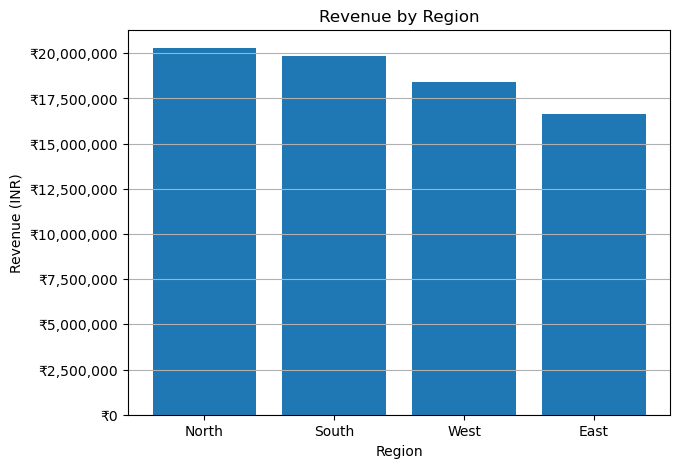

In [34]:
## Region Revenue Chart
plt.figure(figsize=(7,5))

plt.bar(
    region_rev['Region'],
    region_rev['Total Sales (INR)']
)

plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue (INR)')
plt.grid(axis='y')

plt.gca().yaxis.set_major_formatter(
    FuncFormatter(lambda x, _:f'₹{x:,.0f}')
)

plt.savefig('../outputs/region_revenue.png',
            dpi=300,
            bbox_inches='tight')

plt.show()


## Product and Quality Analysis

In [36]:
## Do ratings influence sales? 

rating_sales = (
    df.groupby('Customer Rating')['Total Sales (INR)']
    .mean()
    .reset_index()
)
rating_sales['Total Sales (INR)'] = (
    rating_sales['Total Sales (INR)']
    .round(0)
    .astype(int)
)


rating_sales

,Customer Rating,Total Sales (INR)
0,1.0,52879
1,1.1,76661
2,1.2,94645
3,1.3,83635
4,1.4,87348
5,1.5,49414
6,1.6,69685
7,1.7,84544
8,1.8,91328
9,1.9,71137


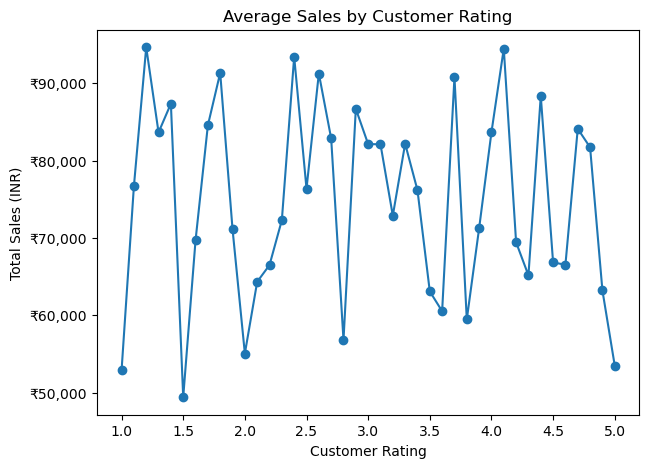

In [37]:
plt.figure(figsize= (7,5))

plt.plot(
    rating_sales['Customer Rating'],
    rating_sales['Total Sales (INR)'],
    marker = 'o'
)

plt.title('Average Sales by Customer Rating')
plt.xlabel('Customer Rating')
plt.ylabel('Total Sales (INR)')

plt.gca().yaxis.set_major_formatter(
    FuncFormatter(lambda x, _:f'₹{x:,.0f}')
)

plt.savefig('../outputs/rating_vs_sales.png',
            dpi=300,
            bbox_inches='tight')

plt.show()

In [38]:
## Top 10 Products by Revenue

top_products = (
    df.groupby('Product Name')['Total Sales (INR)']
    .sum()
    .sort_values(ascending = False)
    .head(10)
    .reset_index()
)

top_products

,Product Name,Total Sales (INR)
0,Educational Book,4522055.35
1,Laptop,4132783.72
2,Table Lamp,3986691.68
3,Headphones,3722765.27
4,Jeans,3685259.60
5,Smartwatch,3680177.80
6,Face Cream,3646816.97
7,Perfume,3266905.75
8,Fiction Novel,3172999.91
9,Jacket,3161049.05


In [42]:
top_products.head()

,Product Name,Total Sales (INR)
0,Educational Book,4522055.35
1,Laptop,4132783.72
2,Table Lamp,3986691.68
3,Headphones,3722765.27
4,Jeans,3685259.60


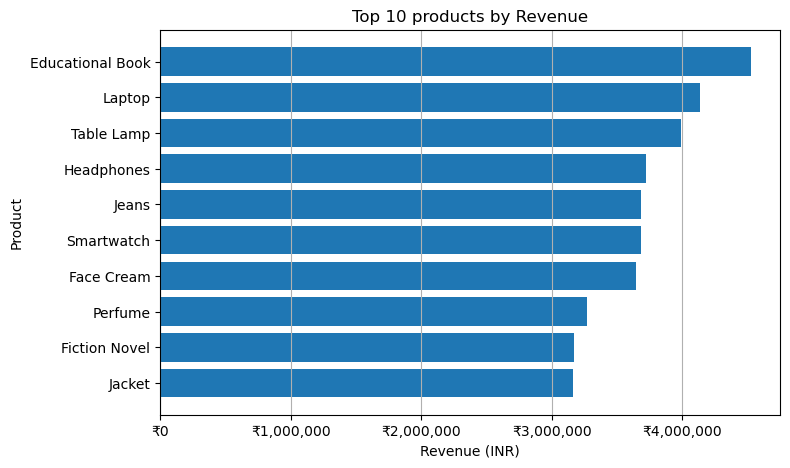

In [44]:
plt.figure(figsize = (8,5))

plt.barh(
    top_products['Product Name'],
    top_products['Total Sales (INR)']
)

plt.title("Top 10 products by Revenue")
plt.xlabel('Revenue (INR)')
plt.ylabel('Product')


plt.gca().xaxis.set_major_formatter(
    FuncFormatter(lambda x, _:f'₹{x:,.0f}')
)
plt.gca().invert_yaxis()
plt.grid(axis = 'x')
plt.savefig('../outputs/top_products.png',
            dpi=300,
            bbox_inches='tight')

plt.show()

In [49]:
## Lowest Rated Products by revenue

product_rating = (
    df.groupby('Product Name')['Customer Rating']
    .mean()
    .reset_index()
)
product_rating['Customer Rating'] = product_rating['Customer Rating'].round(2)

product_rating

,Product Name,Customer Rating
0,Bedsheet,3.71
1,Comic Book,3.29
2,Cookbook,3.07
3,Cookware Set,3.24
4,Dress,2.96
5,Educational Book,3.06
6,Face Cream,3.01
7,Fiction Novel,3.06
8,Hair Dryer,2.63
9,Headphones,2.83


In [51]:
## Product Level Revenue

product_revenue = (
    df.groupby('Product Name')['Total Sales (INR)']
    .sum()
    .reset_index()
)

product_revenue['Total Sales (INR)'] = (
    product_revenue['Total Sales (INR)']
    .round(0)
    .astype(int)
)

product_revenue

,Product Name,Total Sales (INR)
0,Bedsheet,1883843
1,Comic Book,1938460
2,Cookbook,2514179
3,Cookware Set,2490551
4,Dress,2477930
5,Educational Book,4522055
6,Face Cream,3646817
7,Fiction Novel,3173000
8,Hair Dryer,2505131
9,Headphones,3722765


In [53]:
product_perf = pd.merge(
    product_rating,
    product_revenue,
    on = "Product Name"
)

product_perf

,Product Name,Customer Rating,Total Sales (INR)
0,Bedsheet,3.71,1883843
1,Comic Book,3.29,1938460
2,Cookbook,3.07,2514179
3,Cookware Set,3.24,2490551
4,Dress,2.96,2477930
5,Educational Book,3.06,4522055
6,Face Cream,3.01,3646817
7,Fiction Novel,3.06,3173000
8,Hair Dryer,2.63,2505131
9,Headphones,2.83,3722765


In [56]:
## Low Rated Products
low_rated_products = product_perf[
    product_perf['Customer Rating'] <=3.0

]
low_rated_products

,Product Name,Customer Rating,Total Sales (INR)
4,Dress,2.96,2477930
8,Hair Dryer,2.63,2505131
9,Headphones,2.83,3722765
10,Jacket,2.93,3161049
11,Jeans,2.99,3685260
12,Laptop,2.88,4132784
13,Lipstick,2.82,2844209
14,Mixer Grinder,2.90,2297177
16,Self-Help Book,2.91,2638065
17,Shampoo,2.81,2417522


In [57]:
## Low Rated Products Revenue

lowest_rated_by_revenue = (
    low_rated_products
    .sort_values(by = 'Total Sales (INR)', ascending = True)
    .head(10)
)
lowest_rated_by_revenue

,Product Name,Customer Rating,Total Sales (INR)
14,Mixer Grinder,2.90,2297177
17,Shampoo,2.81,2417522
4,Dress,2.96,2477930
8,Hair Dryer,2.63,2505131
16,Self-Help Book,2.91,2638065
13,Lipstick,2.82,2844209
20,Sneakers,2.87,2883135
10,Jacket,2.93,3161049
11,Jeans,2.99,3685260
9,Headphones,2.83,3722765


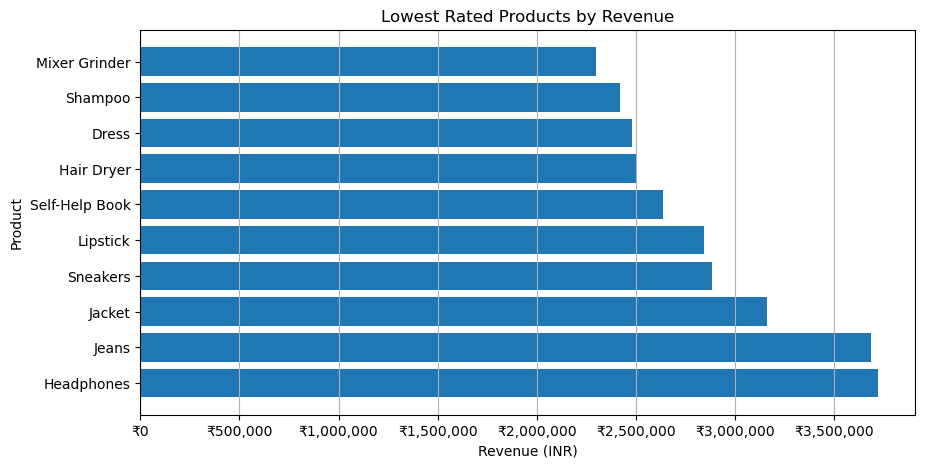

In [58]:
plt.figure(figsize = (10,5))

plt.barh(
    lowest_rated_by_revenue['Product Name'],
    lowest_rated_by_revenue['Total Sales (INR)']
)

plt.title("Lowest Rated Products by Revenue")
plt.xlabel('Revenue (INR)')
plt.ylabel('Product')


plt.gca().xaxis.set_major_formatter(
    FuncFormatter(lambda x, _:f'₹{x:,.0f}')
)
plt.gca().invert_yaxis()
plt.grid(axis = 'x')

plt.savefig('../outputs/lowest_rated_products_by_revenue.png',
            dpi=300,
            bbox_inches='tight')

plt.show()

In [59]:
## Does offering higher discounts actually increase total sales? 

discount_sales_corr = df['Discount %'].corr(df['Total Sales (INR)'])

round(discount_sales_corr, 3)

-0.016

In [60]:
## Save Dataset
df.to_csv('../outputs/flipkart_sales_tableau.csv', index=False)